In [1]:
# Remove cell warnings
import warnings
warnings.filterwarnings('ignore')

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson
from datetime import datetime

# Read in the data (Auto_Theft_Open_Data.csv from downloads folder)
df = pd.read_csv('Auto_Theft_Open_Data.csv')

## Police Dataset

In [3]:
df.head()

,X,Y,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,...,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,-79.306757,43.734652,1,GO-20141263217,2014/01/01 05:00:00+00,2013/12/31 05:00:00+00,2014,January,1,1,...,2135,210,Theft Of Motor Vehicle,Auto Theft,43,Victoria Village,43,Victoria Village (43),-79.306757,43.734652
1,-79.236189,43.721847,2,GO-20141262914,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,2135,210,Theft Of Motor Vehicle,Auto Theft,123,Cliffcrest,123,Cliffcrest (123),-79.236189,43.721847
2,-79.529478,43.618472,3,GO-20141262837,2014/01/01 05:00:00+00,2013/12/25 05:00:00+00,2014,January,1,1,...,2135,210,Theft Of Motor Vehicle,Auto Theft,159,Etobicoke City Centre,14,Islington-City Centre West (14),-79.529478,43.618472
3,-79.516814,43.683438,4,GO-20141265795,2014/01/02 05:00:00+00,2014/01/01 05:00:00+00,2014,January,2,2,...,2135,210,Theft Of Motor Vehicle,Auto Theft,9,Edenbridge-Humber Valley,9,Edenbridge-Humber Valley (9),-79.516814,43.683438
4,-79.595364,43.744281,5,GO-20141265947,2014/01/02 05:00:00+00,2014/01/01 05:00:00+00,2014,January,2,2,...,2135,210,Theft Of Motor Vehicle,Auto Theft,2,Mount Olive-Silverstone-Jamestown,2,Mount Olive-Silverstone-Jamestown (2),-79.595364,43.744281


In [4]:
# Count the occurances for each HOOD_140 and sort by descending order
occ = df['HOOD_140'].value_counts().sort_values(ascending=False)

In [5]:
# Select the first 10 indecies from occ
top10 = occ.iloc[:10].index.tolist()

In [6]:
# Create a new dataframe with only the top 10 HOOD_140
df_top10 = df[df['HOOD_140'].isin(top10)]
# For each HOOD_140, OCC_YEAR & OCC_MONTH, count the occurances 
df_top10_counts = df_top10.groupby(['HOOD_140', 'OCC_YEAR', 'OCC_MONTH']).size().reset_index(name='counts')

In [51]:
df_counts = df.groupby(['HOOD_140', 'OCC_YEAR', 'OCC_MONTH']).size().reset_index(name='counts')

In [52]:
df_counts.head()

,HOOD_140,OCC_YEAR,OCC_MONTH,counts
0,1,2001.0,October,1
1,1,2013.0,December,1
2,1,2013.0,January,2
3,1,2013.0,November,1
4,1,2014.0,April,28


<AxesSubplot:xlabel='DATE', ylabel='counts'>

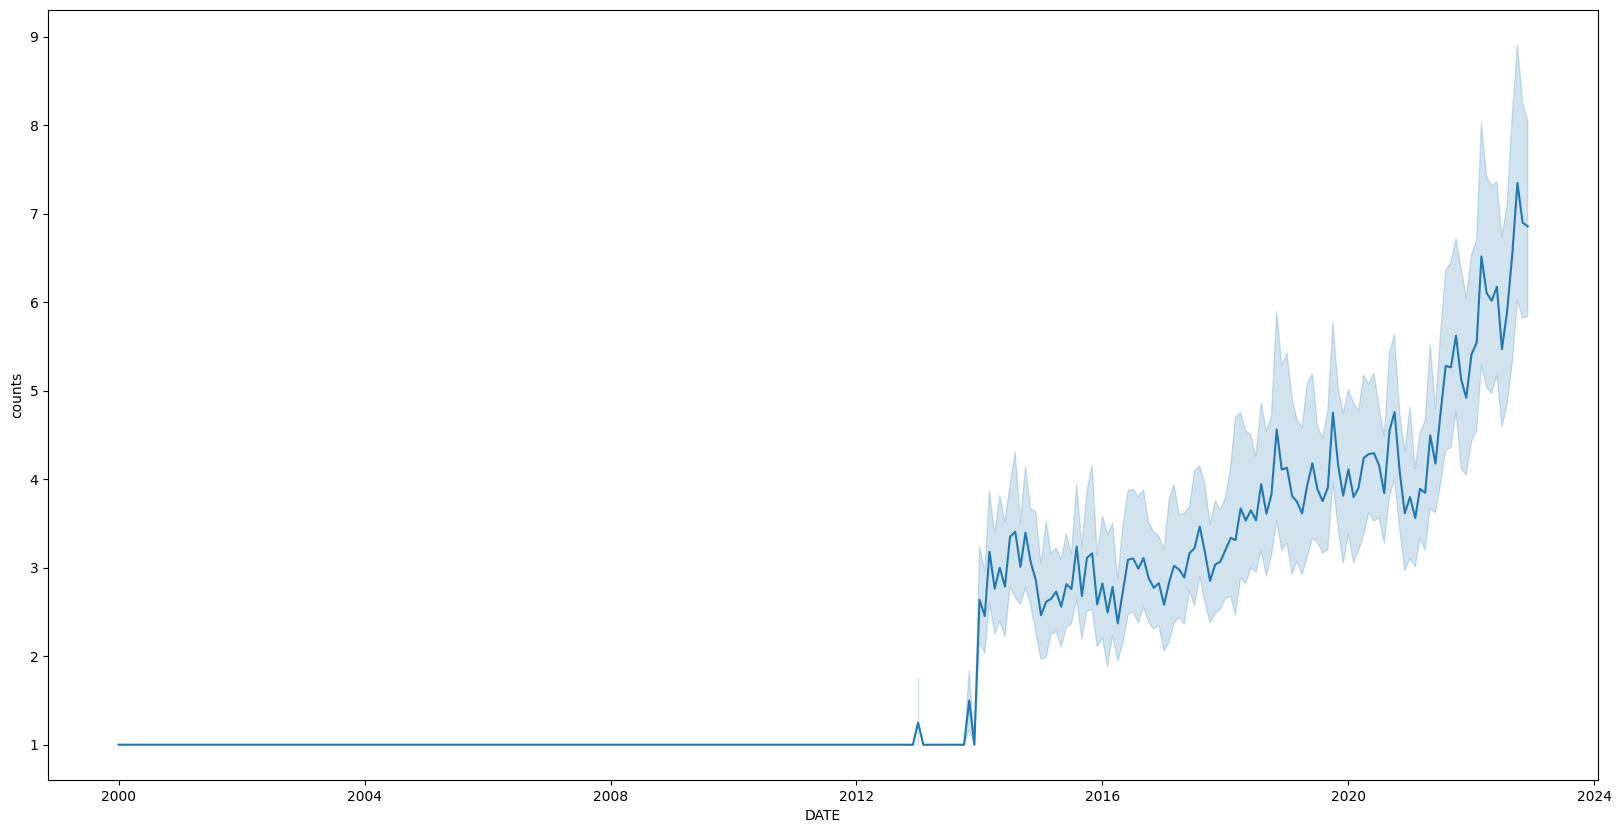

In [53]:
# Line plot of df_counts with counts as y-axis and DATE(OCC_YEAR, OCC_MONTH, 01) as x-axis
plt.figure(figsize=(20,10))
df_counts['OCC_YEAR'] = df_counts['OCC_YEAR'].astype(int)
# Turn the OCC_MONTH from string to int based on month mappings
df_counts['OCC_MONTH'] = df_counts['OCC_MONTH'].map({'January': 1, 'February': 2, 'March': 3, 'April': 4,
                                                        'May': 5, 'June': 6, 'July': 7, 'August': 8,
                                                        'September': 9, 'October': 10, 'November': 11, 'December': 12})
df_counts['DATE'] = df_counts.apply(lambda x: datetime(x['OCC_YEAR'], x['OCC_MONTH'], 1), axis=1)
sns.lineplot(x='DATE', y='counts', data=df_counts)

In [9]:
# What is the mean of counts?
print('mean of counts ' + str(df_counts['counts'].mean()))
# What is the variance of counts?
print('variance of counts ' + str(df_counts['counts'].var()))


mean of counts 3.8927967534663512
variance of counts 22.09352044334111


In [10]:
# What is the average of df_top10_counts['counts']
l = df_counts['counts'].mean()
# Create a new dataframe with x = 1 to np.arange(1, max(df_top10_counts['counts']) + 1, 1) and y = the poisson pdf with lambda = l and x = x
x = np.arange(1, max(df_counts['counts']) + 1, 1)
y = poisson.pmf(x, l)
df_poisson = pd.DataFrame({'x': x, 'y': y})

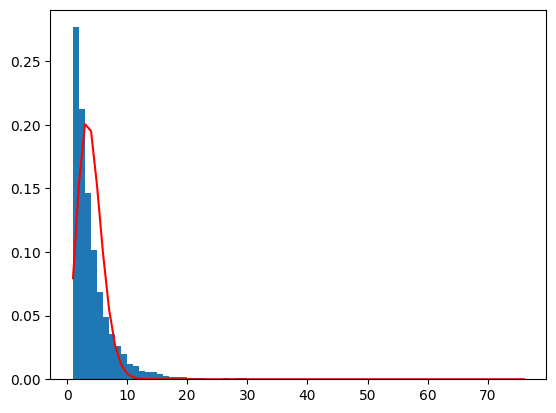

In [11]:
# Create a histogram for counts
plt.hist(df_counts['counts'], bins = np.arange(1, max(df_counts['counts']) + 1, 1),
        density = True)
# Create a line plot for the poisson distribution
plt.plot(df_poisson['x'], df_poisson['y'], color = 'red')
plt.show()


In [12]:
# Floor the count to the nearest 5
df_counts_new = df_counts.copy(deep=True)
df_counts_new['counts'] = np.floor(df_counts['counts'] / 5) * 5
# Repeat for the poissson distribution
df_poisson_new = df_poisson.copy(deep=True)
df_poisson_new['x'] = np.floor(df_poisson['x'] / 5) * 5


In [13]:
# For the poisson distribution, group by x and sum the y values
df_poisson_new = df_poisson_new.groupby('x')['y'].sum().reset_index(name='y')

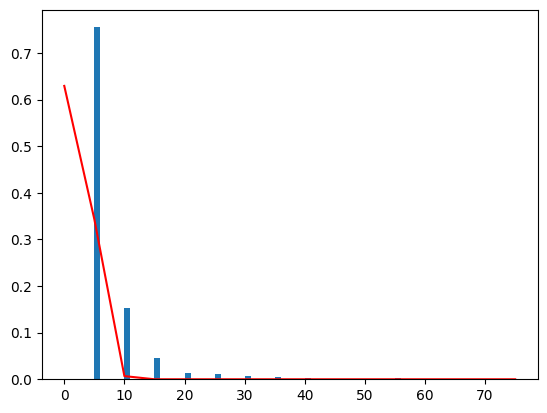

In [14]:
# Recreate the histogram and line plot
plt.hist(df_counts_new['counts'], bins = np.arange(1, max(df_counts_new['counts']) + 1, 1),
        density = True)
plt.plot(df_poisson_new['x'], df_poisson_new['y'], color = 'red')
plt.show()

In [15]:
# Load in the other datasets we're going to use 
pop_change = pd.read_excel('wellbeing-toronto-population-total-2011-2016-and-age-groups-2016.xlsx', 
                           sheet_name='016 Pop_TotalChange')
pop_age = pd.read_excel('wellbeing-toronto-population-total-2011-2016-and-age-groups-2016.xlsx',
                        sheet_name='2016_Age Groups')
econ = pd.read_excel('wellbeing-toronto-economics.xlsx', 
                     sheet_name= 'RawData-Ref Period 2011')
housing = pd.read_excel('wellbeing-toronto-housing.xlsx',
                        sheet_name='RawDataRef_2011')

## Population Change Dataset

In [16]:
# Rename PopChg11t16 to pct_change
pop_change = pop_change.rename(columns={'PopChg11t16': 'pct_change'})
pop_change.head()

,HoodID,Neighbourhood,Pop2016,Pop2011,pct_change
0,1,West Humber-Clairville,33312,34100,-0.023109
1,2,Mount Olive-Silverstone-Jamestown,32954,32788,0.005063
2,3,Thistletown-Beaumond Heights,10360,10138,0.021898
3,4,Rexdale-Kipling,10529,10488,0.003909
4,5,Elms-Old Rexdale,9456,9550,-0.009843


In [17]:
pop_change.describe()

,HoodID,Pop2016,Pop2011,pct_change
count,140.0000,140.000000,140.000000,140.000000
mean,70.5000,19511.221429,18679.000000,0.040404
std,40.5586,10033.589222,9100.831576,0.089014
min,1.0000,6577.000000,6488.000000,-0.075937
25%,35.7500,12019.500000,11853.750000,-0.003442
50%,70.5000,16749.500000,16364.500000,0.014677
75%,105.2500,23854.500000,22407.500000,0.042488
max,140.0000,65913.000000,53350.000000,0.520099


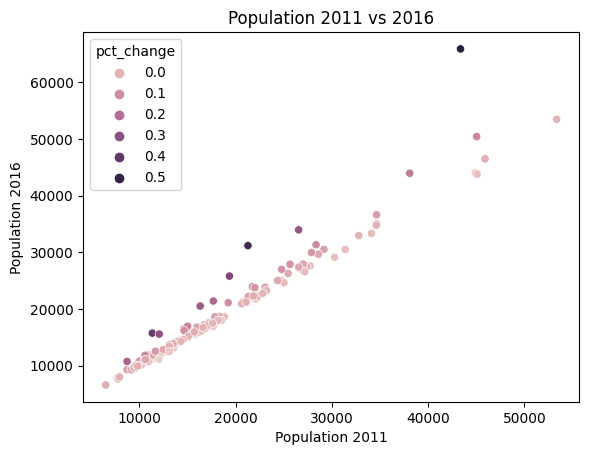

In [18]:
# Create a scatterplot with Pop2011 on the x-axis and Pop2016 on the y-axis & use the pct_change as the hue
sns.scatterplot(x='Pop2011', y='Pop2016', hue='pct_change', data=pop_change)
# Add title and axis labels
plt.title('Population 2011 vs 2016')
plt.xlabel('Population 2011')
plt.ylabel('Population 2016')
plt.show()


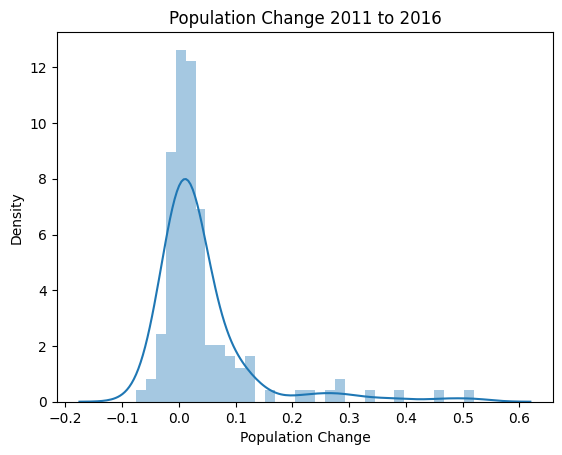

In [19]:
# Create a histogram of pct_change
sns.distplot(pop_change['pct_change'], kde=True)
# Add title and axis labels
plt.title('Population Change 2011 to 2016')
plt.xlabel('Population Change')
plt.ylabel('Density')
plt.show()

## Population Age Dataset

In [20]:
pop_age.head()

,NeighbourhoodID,Neighbourhood,0 to 04 years,0 to 14 years,05 to 09 years,10 to 14 years,100 years and over,15 to 19 years,20 to 24 years,25 to 29 years,...,65 to 69 years,65 years and over,70 to 74 years,75 to 79 years,80 to 84 years,85 to 89 years,85 years and over,90 to 94 years,95 to 99 years,Total Population - All Age Groups - 100% data
0,1.0,West Humber-Clairville,1540.0,5060.0,1720.0,1790.0,5.0,2325.0,3120.0,2785.0,...,1595.0,4980.0,1185.0,885.0,700.0,400.0,615.0,160.0,50.0,33320.0
1,2.0,Mount Olive-Silverstone-Jamestown,2190.0,7090.0,2500.0,2415.0,0.0,2585.0,2655.0,2400.0,...,1285.0,3560.0,885.0,630.0,465.0,225.0,300.0,70.0,10.0,32950.0
2,3.0,Thistletown-Beaumond Heights,540.0,1730.0,600.0,595.0,5.0,650.0,760.0,680.0,...,490.0,1880.0,375.0,335.0,320.0,225.0,350.0,100.0,20.0,10360.0
3,4.0,Rexdale-Kipling,560.0,1640.0,515.0,565.0,0.0,635.0,720.0,715.0,...,520.0,1730.0,350.0,295.0,270.0,205.0,300.0,85.0,15.0,10530.0
4,5.0,Elms-Old Rexdale,540.0,1805.0,605.0,660.0,0.0,690.0,750.0,600.0,...,415.0,1275.0,305.0,235.0,180.0,105.0,145.0,40.0,5.0,9460.0


In [21]:
# There are columns that contain the same information, so select the columns of interest
pop_age = pop_age[['NeighbourhoodID', 'Neighbourhood', '0 to 14 years', '15 to 19 years', '20 to 24 years', '25 to 29 years', '30 to 34 years', '35 to 39 years', 
         '40 to 44 years', '50 to 54 years', '55 to 59 years', '60 to 64 years', '65 to 69 years', '70 to 74 years', '75 to 79 years', 
         '80 to 84 years', '85 to 89 years', '90 to 94 years', '95 to 99 years', '100 years and over', 'Total Population - All Age Groups - 100% data']]

In [22]:
# There isn't 45-49 years so we'll have to create it
# Subtract the sum of all other ages from Total Population - All Age Groups - 100% data
pop_age['45 to 49 years'] = pop_age['Total Population - All Age Groups - 100% data'] - pop_age[['0 to 14 years', '15 to 19 years', '20 to 24 years', '25 to 29 years', '30 to 34 years', '35 to 39 years',
                                                                                                '40 to 44 years', '50 to 54 years', '55 to 59 years', '60 to 64 years', '65 to 69 years', '70 to 74 years',
                                                                                                '75 to 79 years', '80 to 84 years', '85 to 89 years', '90 to 94 years', '95 to 99 years', '100 years and over']].sum(axis=1)
pop_age.head()

,NeighbourhoodID,Neighbourhood,0 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,50 to 54 years,...,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 to 89 years,90 to 94 years,95 to 99 years,100 years and over,Total Population - All Age Groups - 100% data,45 to 49 years
0,1.0,West Humber-Clairville,5060.0,2325.0,3120.0,2785.0,2345.0,2035.0,1980.0,2475.0,...,1595.0,1185.0,885.0,700.0,400.0,160.0,50.0,5.0,33320.0,2225.0
1,2.0,Mount Olive-Silverstone-Jamestown,7090.0,2585.0,2655.0,2400.0,2250.0,2185.0,2275.0,2190.0,...,1285.0,885.0,630.0,465.0,225.0,70.0,10.0,0.0,32950.0,2275.0
2,3.0,Thistletown-Beaumond Heights,1730.0,650.0,760.0,680.0,715.0,665.0,610.0,770.0,...,490.0,375.0,335.0,320.0,225.0,100.0,20.0,5.0,10360.0,715.0
3,4.0,Rexdale-Kipling,1640.0,635.0,720.0,715.0,680.0,640.0,680.0,815.0,...,520.0,350.0,295.0,270.0,205.0,85.0,15.0,0.0,10530.0,745.0
4,5.0,Elms-Old Rexdale,1805.0,690.0,750.0,600.0,575.0,550.0,540.0,755.0,...,415.0,305.0,235.0,180.0,105.0,40.0,5.0,0.0,9460.0,655.0


In [23]:
pop_age.describe()

,NeighbourhoodID,0 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,50 to 54 years,55 to 59 years,...,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 to 89 years,90 to 94 years,95 to 99 years,100 years and over,Total Population - All Age Groups - 100% data,45 to 49 years
count,140.0000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,...,140.00000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,139.000000,139.000000
mean,70.5000,2837.750000,1039.535714,1390.500000,1664.178571,1604.535714,1403.357143,1304.428571,1446.178571,1329.857143,...,947.50000,668.142857,543.107143,431.928571,292.785714,139.500000,103.678571,9.035714,19578.992806,1368.345324
std,40.5586,1554.223108,604.784252,972.859262,1643.790431,1378.752420,864.083380,661.347569,696.396844,675.931530,...,490.19505,346.117907,296.071683,249.488387,179.821326,95.928443,835.185244,45.628688,10037.837423,645.373274
min,1.0000,425.000000,295.000000,375.000000,320.000000,285.000000,355.000000,375.000000,380.000000,320.000000,...,275.00000,190.000000,105.000000,65.000000,35.000000,10.000000,0.000000,0.000000,6585.000000,380.000000
25%,35.7500,1695.000000,633.750000,763.750000,831.250000,838.750000,861.250000,837.500000,920.000000,865.000000,...,598.75000,420.000000,325.000000,240.000000,163.750000,70.000000,13.750000,0.000000,12232.500000,867.500000
50%,70.5000,2405.000000,890.000000,1142.500000,1237.500000,1295.000000,1220.000000,1130.000000,1247.500000,1125.000000,...,822.50000,580.000000,472.500000,367.500000,237.500000,110.000000,25.000000,5.000000,16775.000000,1235.000000
75%,105.2500,3567.500000,1271.250000,1562.500000,2012.500000,1800.000000,1665.000000,1626.250000,1831.250000,1680.000000,...,1190.00000,830.000000,703.750000,562.500000,401.250000,191.250000,50.000000,10.000000,23880.000000,1730.000000
max,140.0000,9625.000000,3400.000000,6700.000000,15755.000000,12400.000000,6815.000000,4135.000000,3750.000000,4195.000000,...,2635.00000,1855.000000,1770.000000,1440.000000,955.000000,520.000000,9910.000000,540.000000,65920.000000,3585.000000


In [24]:
# When is NeighbourhoodID null
pop_age[pop_age['NeighbourhoodID'].isnull()]

,NeighbourhoodID,Neighbourhood,0 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,50 to 54 years,...,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 to 89 years,90 to 94 years,95 to 99 years,100 years and over,Total Population - All Age Groups - 100% data,45 to 49 years
140,NaN,410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Drop rows where NeighbourhoodID is null
pop_age = pop_age.dropna(subset=['NeighbourhoodID'])

In [26]:
# There are a lot of columns, let's group in 10 year increments
# Create a new dataframe with the columns of interest
pop_age_new = pop_age[['NeighbourhoodID', 'Neighbourhood', '0 to 14 years', '15 to 19 years', '20 to 24 years', '25 to 29 years', '30 to 34 years', '35 to 39 years',
                          '40 to 44 years', '45 to 49 years', '50 to 54 years', '55 to 59 years', '60 to 64 years', '65 to 69 years', '70 to 74 years',
                            '75 to 79 years', '80 to 84 years', '85 to 89 years', '90 to 94 years', '95 to 99 years', '100 years and over']].copy(deep=True)
# Group the columns in 10 year increments
pop_age_new['0 to 19 years'] = pop_age_new[['0 to 14 years', '15 to 19 years']].sum(axis=1).astype(int)
pop_age_new['20 to 29 years'] = pop_age_new[['20 to 24 years', '25 to 29 years']].sum(axis=1).astype(int)
pop_age_new['30 to 39 years'] = pop_age_new[['30 to 34 years', '35 to 39 years']].sum(axis=1).astype(int)
pop_age_new['40 to 49 years'] = pop_age_new[['40 to 44 years', '45 to 49 years']].sum(axis=1).astype(int)
pop_age_new['50 to 59 years'] = pop_age_new[['50 to 54 years', '55 to 59 years']].sum(axis=1).astype(int)
pop_age_new['60 to 69 years'] = pop_age_new[['60 to 64 years', '65 to 69 years']].sum(axis=1).astype(int)
# Group 70+ together
pop_age_new['70+ years'] = pop_age_new[['70 to 74 years', '75 to 79 years', '80 to 84 years', '85 to 89 years', '90 to 94 years', '95 to 99 years', '100 years and over']].sum(axis=1).astype(int)
# Drop the columns we grouped
pop_age_new = pop_age_new.drop(columns=['0 to 14 years', '15 to 19 years', '20 to 24 years', '25 to 29 years', '30 to 34 years', '35 to 39 years',
                            '40 to 44 years', '45 to 49 years', '50 to 54 years', '55 to 59 years', '60 to 64 years', '65 to 69 years', '70 to 74 years',
                            '75 to 79 years', '80 to 84 years', '85 to 89 years', '90 to 94 years', '95 to 99 years', '100 years and over'])
pop_age_new.head()


,NeighbourhoodID,Neighbourhood,0 to 19 years,20 to 29 years,30 to 39 years,40 to 49 years,50 to 59 years,60 to 69 years,70+ years
0,1.0,West Humber-Clairville,7385,5905,4380,4205,4670,3390,3385
1,2.0,Mount Olive-Silverstone-Jamestown,9675,5055,4435,4550,4145,2805,2285
2,3.0,Thistletown-Beaumond Heights,2380,1440,1380,1325,1430,1025,1380
3,4.0,Rexdale-Kipling,2275,1435,1320,1425,1685,1170,1220
4,5.0,Elms-Old Rexdale,2495,1350,1125,1195,1485,940,870


In [27]:
# Turn NeighbourhoodID into integer
pop_age_new['NeighbourhoodID'] = pop_age_new['NeighbourhoodID'].astype(int)

In [28]:
pop_age_new.describe()

,NeighbourhoodID,0 to 19 years,20 to 29 years,30 to 39 years,40 to 49 years,50 to 59 years,60 to 69 years,70+ years
count,140.0000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,70.5000,3877.285714,3054.678571,3007.892857,2663.000000,2776.035714,2045.178571,2188.178571
std,40.5586,2131.700302,2514.819616,2217.259802,1299.784957,1335.364916,1001.602387,1431.548592
min,1.0000,895.000000,775.000000,640.000000,755.000000,700.000000,635.000000,415.000000
25%,35.7500,2352.500000,1642.500000,1637.500000,1715.000000,1785.000000,1330.000000,1270.000000
50%,70.5000,3270.000000,2290.000000,2537.500000,2350.000000,2385.000000,1785.000000,1775.000000
75%,105.2500,4811.250000,3611.250000,3407.500000,3326.250000,3525.000000,2572.500000,2730.000000
max,140.0000,13025.000000,22455.000000,19215.000000,7360.000000,7240.000000,5725.000000,12370.000000


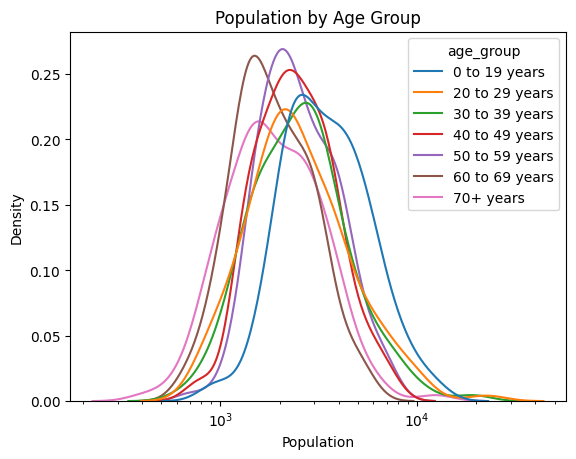

In [29]:
# Create histograms for each age group using color for each age group
# Turn the dataframe into a long dataframe
pop_age_new_long = pd.melt(pop_age_new, id_vars=['NeighbourhoodID', 'Neighbourhood'], var_name='age_group', value_name='population')
# Create the histogram with population on the x-axis and density on the y-axis and use the age_group as the hue
sns.kdeplot(data = pop_age_new_long, x = 'population', hue = 'age_group',
             palette=sns.color_palette("tab10")[:7], log_scale = True)

# # Add title and axis labels
plt.title('Population by Age Group')
plt.xlabel('Population')
plt.ylabel('Density')
plt.show()

In [30]:
pop_age_new.columns

Index(['NeighbourhoodID', 'Neighbourhood', '0 to 19 years', '20 to 29 years',
       '30 to 39 years', '40 to 49 years', '50 to 59 years', '60 to 69 years',
       '70+ years'],
      dtype='object')

Text(0.5, 1.0, 'Correlation of Age Groups')

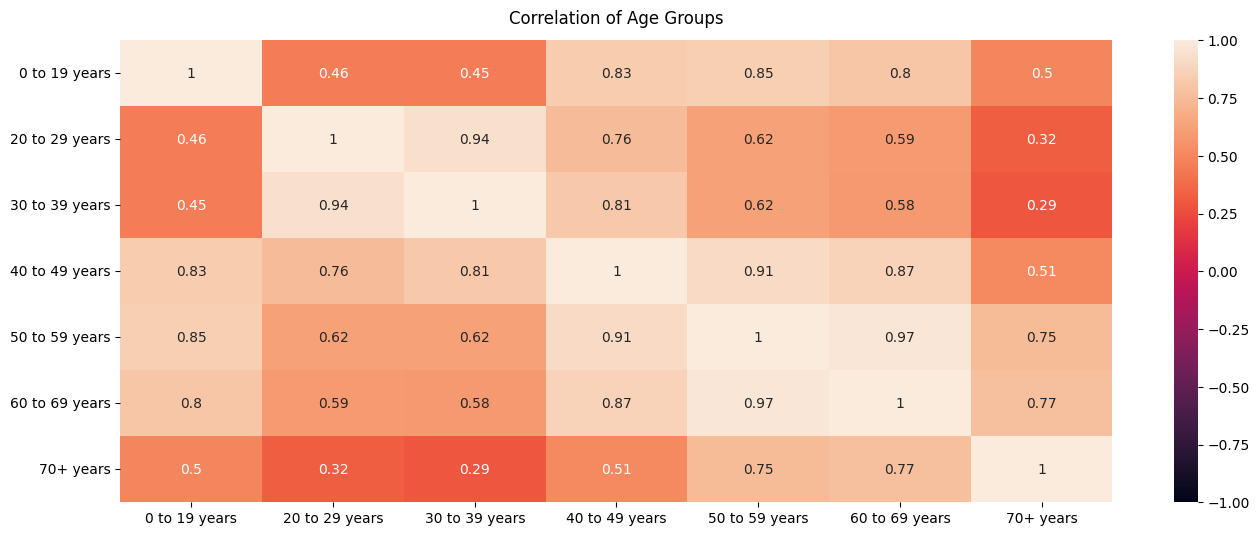

In [31]:
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(pop_age_new[['0 to 19 years', '20 to 29 years',
       '30 to 39 years', '40 to 49 years', '50 to 59 years', '60 to 69 years',
       '70+ years']].corr(), 
       vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation of Age Groups', fontdict={'fontsize':12}, pad=12)

## Economics Dataset

In [32]:
econ.head()

,Neighbourhood,Neighbourhood Id,Businesses,Child Care Spaces,Debt Risk Score,Home Prices,Local Employment,Social Assistance Recipients
0,West Humber-Clairville,1,2463,195,719,317508,58271,2912
1,Mount Olive-Silverstone-Jamestown,2,271,60,687,251119,3244,6561
2,Thistletown-Beaumond Heights,3,217,25,718,414216,1311,1276
3,Rexdale-Kipling,4,144,75,721,392271,1178,1323
4,Elms-Old Rexdale,5,67,60,692,233832,903,1683


In [33]:
econ.describe()

,Neighbourhood Id,Businesses,Child Care Spaces,Debt Risk Score,Home Prices,Local Employment,Social Assistance Recipients
count,140.0000,140.000000,140.000000,140.000000,1.400000e+02,140.0000,140.000000
mean,70.5000,536.321429,124.685714,739.157143,5.481934e+05,9409.3500,1864.700000
std,40.5586,637.210719,81.603541,28.626162,2.676674e+05,19125.3383,1504.562647
min,1.0000,47.000000,0.000000,661.000000,2.041040e+05,438.0000,37.000000
25%,35.7500,169.750000,60.000000,720.500000,3.749645e+05,2069.5000,697.000000
50%,70.5000,345.500000,109.500000,741.000000,4.912100e+05,4052.5000,1455.000000
75%,105.2500,591.000000,176.000000,759.000000,5.902160e+05,10127.0000,2682.750000
max,140.0000,4324.000000,441.000000,793.000000,1.849084e+06,185891.0000,7263.000000


In [34]:
# Are there any null values?
econ.isnull().any()

Neighbourhood                   False
Neighbourhood Id                False
Businesses                      False
Child Care Spaces               False
Debt Risk Score                 False
Home Prices                     False
Local Employment                False
Social Assistance Recipients    False
dtype: bool

In [35]:
# Drop the home price column since that's also in the hosuing dataset
econ = econ.drop(columns=['Home Prices'])

In [36]:
econ.head()

,Neighbourhood,Neighbourhood Id,Businesses,Child Care Spaces,Debt Risk Score,Local Employment,Social Assistance Recipients
0,West Humber-Clairville,1,2463,195,719,58271,2912
1,Mount Olive-Silverstone-Jamestown,2,271,60,687,3244,6561
2,Thistletown-Beaumond Heights,3,217,25,718,1311,1276
3,Rexdale-Kipling,4,144,75,721,1178,1323
4,Elms-Old Rexdale,5,67,60,692,903,1683


In [37]:
econ.columns

Index(['Neighbourhood', 'Neighbourhood Id', 'Businesses', 'Child Care Spaces',
       'Debt Risk Score', 'Local Employment', 'Social Assistance Recipients'],
      dtype='object')

Text(0.5, 1.0, 'Correlation of Economic Metrics')

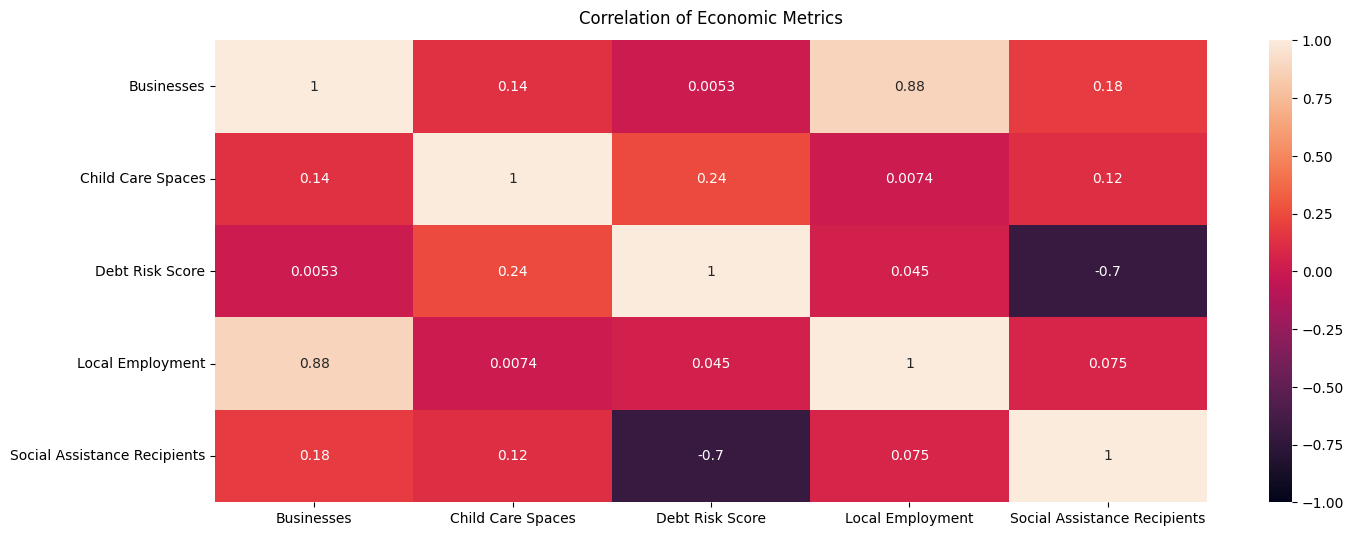

In [38]:
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(econ[['Businesses', 'Child Care Spaces',
       'Debt Risk Score', 'Local Employment', 'Social Assistance Recipients']].corr(), 
       vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation of Economic Metrics', fontdict={'fontsize':12}, pad=12)

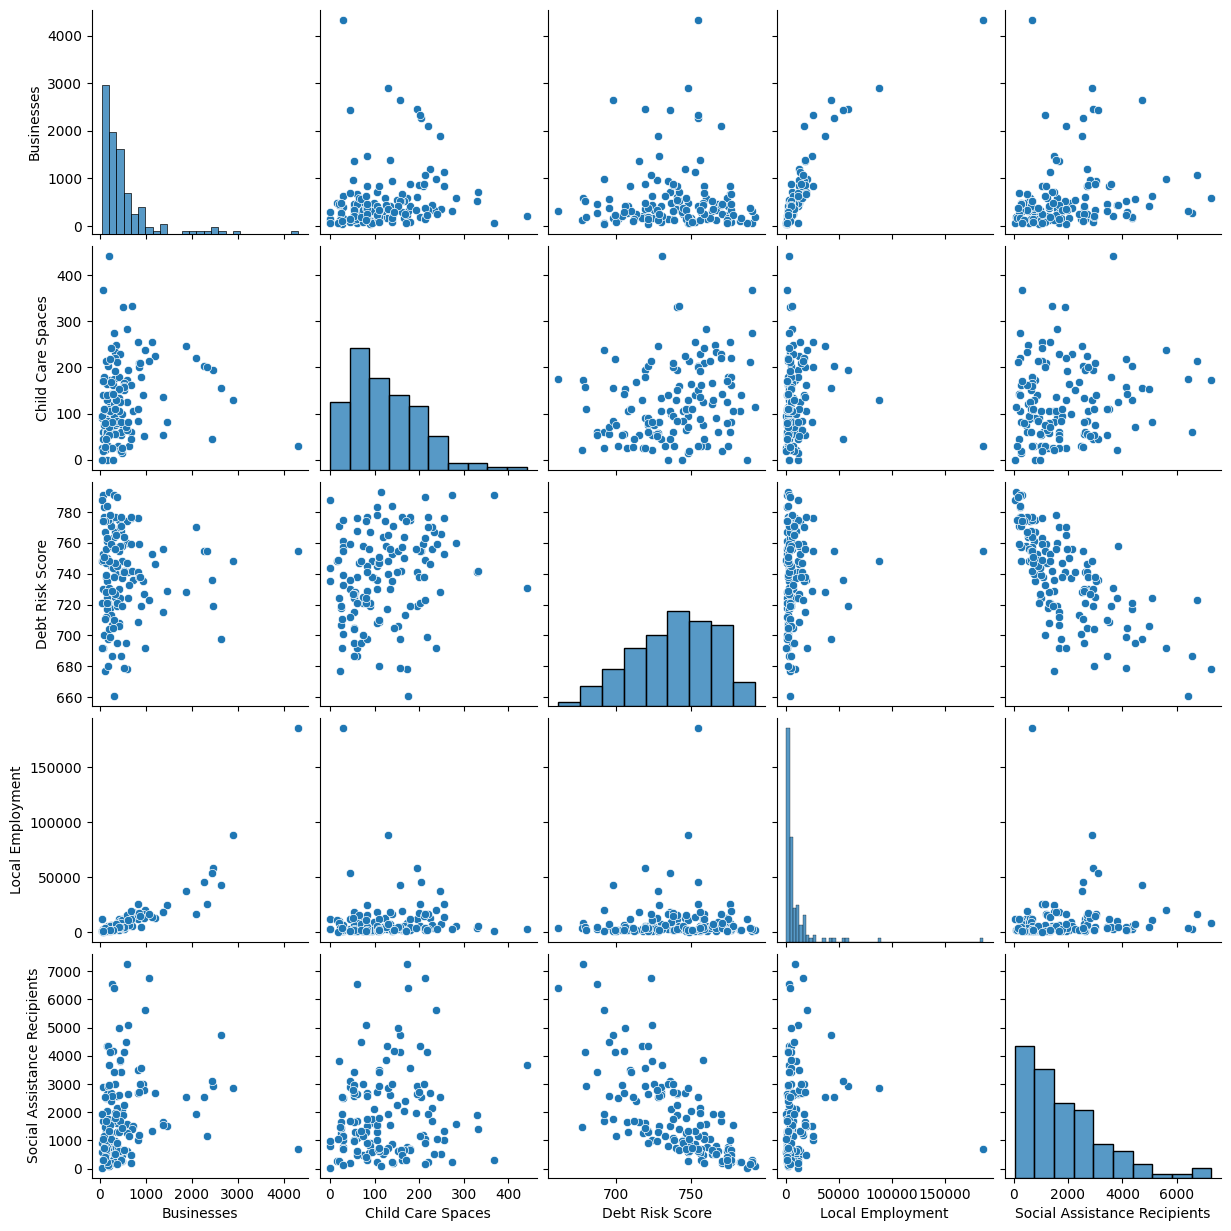

In [39]:
# Create a pairplot of the economic metrics
sns.pairplot(econ[['Businesses', 'Child Care Spaces',
         'Debt Risk Score', 'Local Employment', 'Social Assistance Recipients']])
plt.show()

## Housing Dataset

In [40]:
housing.head()

,Neighbourhood,Neighbourhood Id,Home Prices,Mid-Century Highrise Households,Mid-Century Highrise Population,Percent Mid-Century Highrise Households,Percent Mid-Century Highrise Population,Rent Bank Applicants,Social Housing Turnover,Social Housing Units,Social Housing Waiting List
0,West Humber-Clairville,1,317508,690,1810,6.8,5.3,38,0.312500,952,557
1,Mount Olive-Silverstone-Jamestown,2,251119,4110,13395,42.9,40.9,41,7.000000,1146,1049
2,Thistletown-Beaumond Heights,3,414216,430,1260,13.4,12.4,7,1.333333,447,270
3,Rexdale-Kipling,4,392271,600,1050,15.2,10.0,19,4.200000,432,186
4,Elms-Old Rexdale,5,233832,870,2305,27.3,24.1,14,1.000000,463,239


Text(0.5, 1.0, 'Correlation of Housing Metrics')

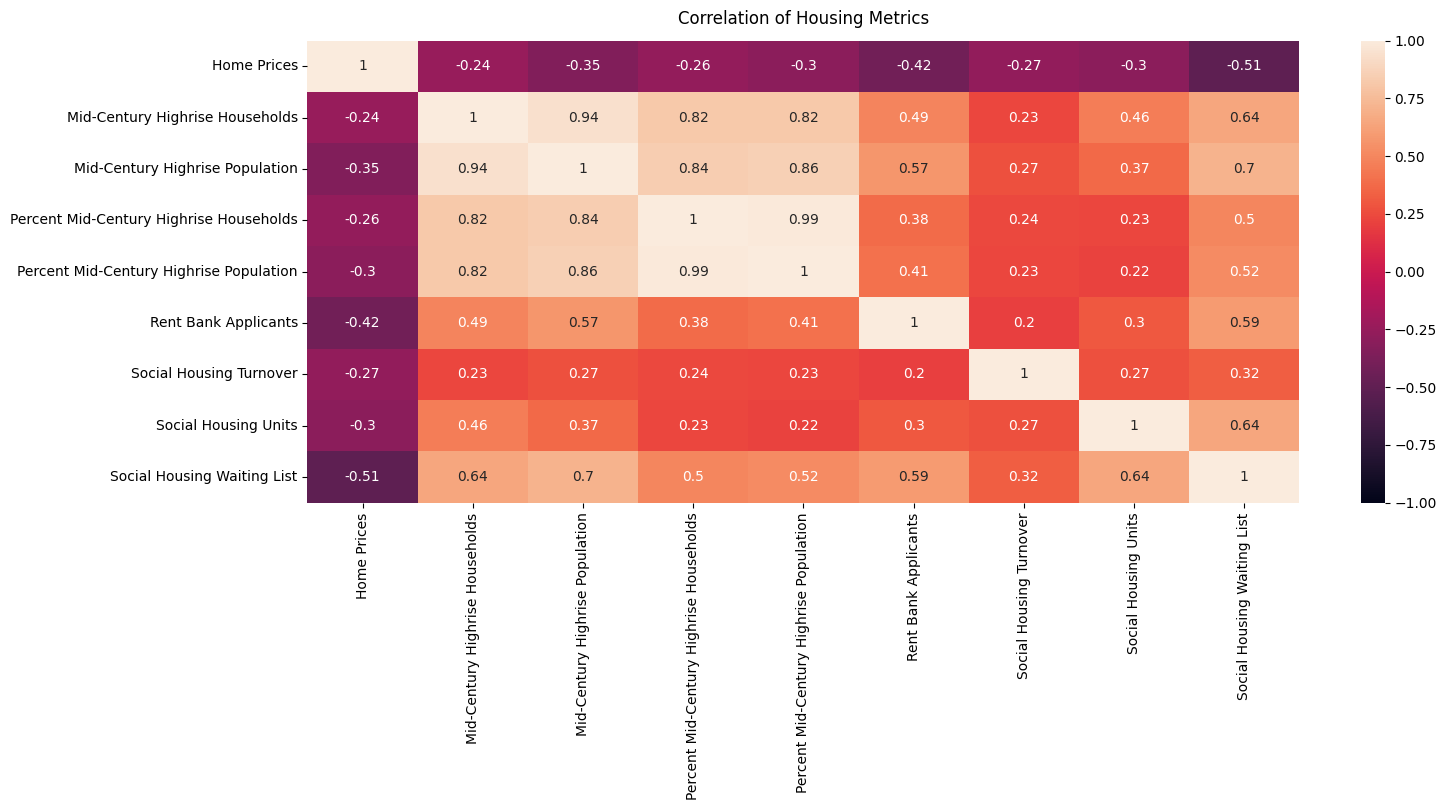

In [41]:
# Let's do a correlation matrix for the housing dataset
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(housing[['Home Prices', 'Mid-Century Highrise Households', 'Mid-Century Highrise Population',
         'Percent Mid-Century Highrise Households', 'Percent Mid-Century Highrise Population',
            'Rent Bank Applicants', 'Social Housing Turnover', 'Social Housing Units', 'Social Housing Waiting List']].corr(),
         vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation of Housing Metrics', fontdict={'fontsize':12}, pad=12)



In [65]:
# When is df_counts['HOOD_140'] NSA
# Drop these rows
df_counts = df_counts.drop(df_counts[df_counts['HOOD_140'] == 'NSA'].index)

In [66]:
# Turn HOOD_140 to int
df_counts['HOOD_140'] = df_counts['HOOD_140'].astype(int)
pop_change['HoodID'] = pop_change['HoodID'].astype(int)
pop_age_new['NeighbourhoodID'] = pop_age_new['NeighbourhoodID'].astype(int)
econ['Neighbourhood Id'] = econ['Neighbourhood Id'].astype(int)
housing['Neighbourhood Id'] = housing['Neighbourhood Id'].astype(int)

In [69]:
# Let's join the datasets together to df_counts based on HOOD_140
master_agg_df = df_counts\
    .merge(pop_change, left_on='HOOD_140', right_on='HoodID', how='left')\
    .merge(pop_age_new, left_on='HOOD_140', right_on='NeighbourhoodID', how='left')\
    .merge(econ, left_on='HOOD_140', right_on='Neighbourhood Id', how='left')\
    .merge(housing, left_on='HOOD_140', right_on='Neighbourhood Id', how='left')
master_agg_df.head()

,HOOD_140,OCC_YEAR,OCC_MONTH,counts,DATE,HoodID,Neighbourhood_x,Pop2016,Pop2011,pct_change,...,Neighbourhood Id_y,Home Prices,Mid-Century Highrise Households,Mid-Century Highrise Population,Percent Mid-Century Highrise Households,Percent Mid-Century Highrise Population,Rent Bank Applicants,Social Housing Turnover,Social Housing Units,Social Housing Waiting List
0,1,2001,10,1,2001-10-01,1,West Humber-Clairville,33312,34100,-0.023109,...,1,317508,690,1810,6.8,5.3,38,0.3125,952,557
1,1,2013,12,1,2013-12-01,1,West Humber-Clairville,33312,34100,-0.023109,...,1,317508,690,1810,6.8,5.3,38,0.3125,952,557
2,1,2013,1,2,2013-01-01,1,West Humber-Clairville,33312,34100,-0.023109,...,1,317508,690,1810,6.8,5.3,38,0.3125,952,557
3,1,2013,11,1,2013-11-01,1,West Humber-Clairville,33312,34100,-0.023109,...,1,317508,690,1810,6.8,5.3,38,0.3125,952,557
4,1,2014,4,28,2014-04-01,1,West Humber-Clairville,33312,34100,-0.023109,...,1,317508,690,1810,6.8,5.3,38,0.3125,952,557


In [70]:
master_agg_df.columns

Index(['HOOD_140', 'OCC_YEAR', 'OCC_MONTH', 'counts', 'DATE', 'HoodID',
       'Neighbourhood_x', 'Pop2016', 'Pop2011', 'pct_change',
       'NeighbourhoodID', 'Neighbourhood_y', '0 to 19 years', '20 to 29 years',
       '30 to 39 years', '40 to 49 years', '50 to 59 years', '60 to 69 years',
       '70+ years', 'Neighbourhood_x', 'Neighbourhood Id_x', 'Businesses',
       'Child Care Spaces', 'Debt Risk Score', 'Local Employment',
       'Social Assistance Recipients', 'Neighbourhood_y', 'Neighbourhood Id_y',
       'Home Prices', 'Mid-Century Highrise Households',
       'Mid-Century Highrise Population',
       'Percent Mid-Century Highrise Households',
       'Percent Mid-Century Highrise Population', 'Rent Bank Applicants',
       'Social Housing Turnover', 'Social Housing Units',
       'Social Housing Waiting List'],
      dtype='object')

In [71]:
# Drop HoodID, Neighbourhood_x, Neighbourhood Id_y, NeighbourhoodID, Neighbourhood_x, Neighbourhood Id_x, Neighbourhood_y, Neighbourhood Id_y
master_agg_df = master_agg_df.drop(columns=['HoodID', 'Neighbourhood_x', 'Neighbourhood Id_y', 
                                            'NeighbourhoodID', 'Neighbourhood_x', 'Neighbourhood Id_x', 'Neighbourhood_y', 'Neighbourhood Id_y'])

In [72]:
master_agg_df.head()

,HOOD_140,OCC_YEAR,OCC_MONTH,counts,DATE,Pop2016,Pop2011,pct_change,0 to 19 years,20 to 29 years,...,Social Assistance Recipients,Home Prices,Mid-Century Highrise Households,Mid-Century Highrise Population,Percent Mid-Century Highrise Households,Percent Mid-Century Highrise Population,Rent Bank Applicants,Social Housing Turnover,Social Housing Units,Social Housing Waiting List
0,1,2001,10,1,2001-10-01,33312,34100,-0.023109,7385,5905,...,2912,317508,690,1810,6.8,5.3,38,0.3125,952,557
1,1,2013,12,1,2013-12-01,33312,34100,-0.023109,7385,5905,...,2912,317508,690,1810,6.8,5.3,38,0.3125,952,557
2,1,2013,1,2,2013-01-01,33312,34100,-0.023109,7385,5905,...,2912,317508,690,1810,6.8,5.3,38,0.3125,952,557
3,1,2013,11,1,2013-11-01,33312,34100,-0.023109,7385,5905,...,2912,317508,690,1810,6.8,5.3,38,0.3125,952,557
4,1,2014,4,28,2014-04-01,33312,34100,-0.023109,7385,5905,...,2912,317508,690,1810,6.8,5.3,38,0.3125,952,557


In [73]:
master_agg_df.shape

(11719, 29)

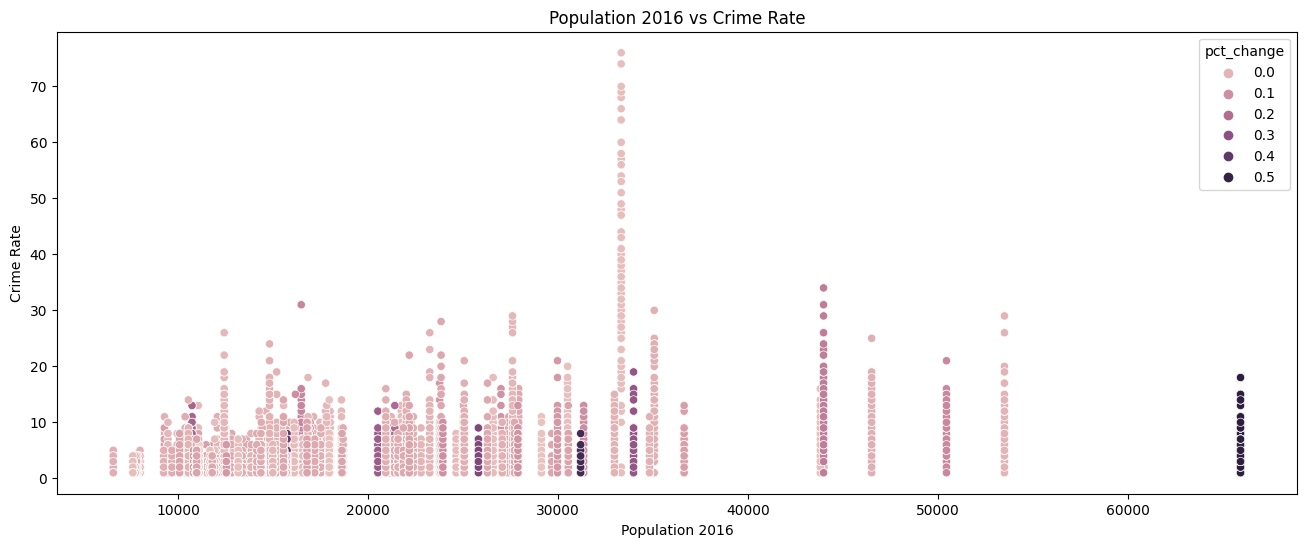

In [77]:
# Are crime rates happening and more populated areas?
plt.figure(figsize=(16, 6))
# Create a scatterplot with Pop2011 on the x-axis and Pop2016 on the y-axis & use the pct_change as the hue
sns.scatterplot(x='Pop2016', y='counts', data=master_agg_df, hue='pct_change')
# Add title and axis labels
plt.title('Population 2016 vs Crime Rate')
plt.xlabel('Population 2016')
plt.ylabel('Crime Rate')
plt.show()


<AxesSubplot:xlabel='Home Prices', ylabel='counts'>

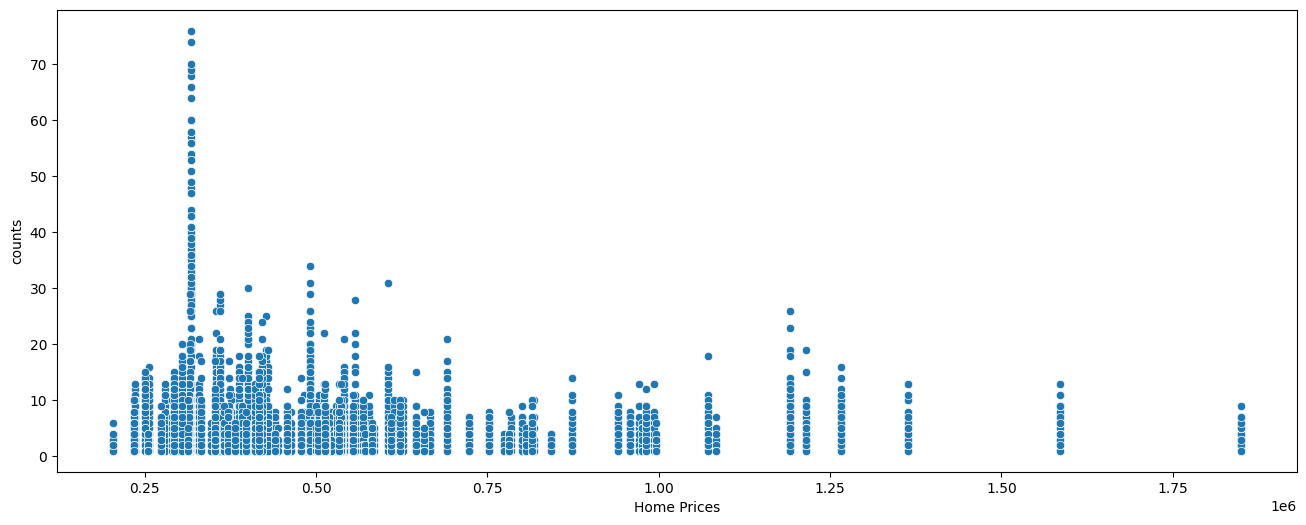

In [78]:
# Are the happening in areas with higher income?
plt.figure(figsize=(16, 6))
# Create a scatterplot with Home Prices on the x-axis and counts on the y-axis
sns.scatterplot(x='Home Prices', y='counts', data=master_agg_df)

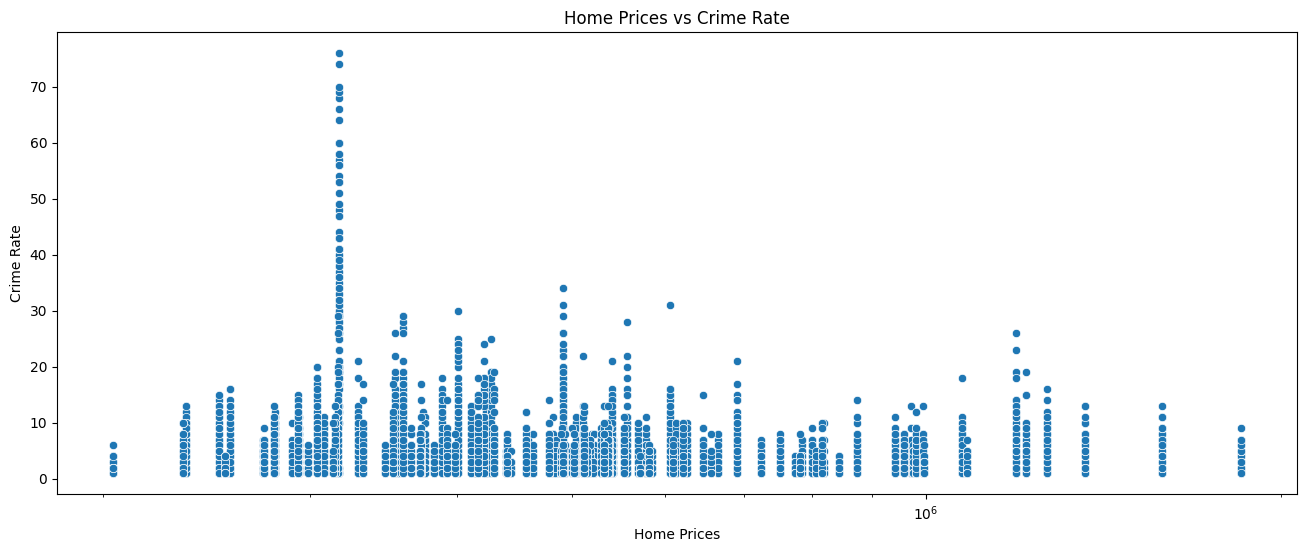

In [80]:
# Try with log home price
plt.figure(figsize=(16, 6))
# Create a scatterplot with Home Prices on the x-axis and counts on the y-axis
sns.scatterplot(x='Home Prices', y='counts', data=master_agg_df)
# Add title and axis labels
plt.title('Home Prices vs Crime Rate')
plt.xlabel('Home Prices')
plt.ylabel('Crime Rate')
plt.xscale('log')
plt.show()